### BBC CLassificatin
* i used re labrary for cleaning text
* Apply TFIDF on  the Text 
* Apply label Encoder on the column category
* Apply baseline Logistic Regression to give me Accuracy training is 99% and testing is 98%
$$\small{By:mahmoud ibrahim}$$

In [408]:
FILE_PATH ="bbc-text.csv"
Tfidf     ="TFIDF.pkl"
FSelection ="FeatureSelection,pkl"
EXPORT_MODEL ="Model.pkl"

In [407]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import plotly
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile , chi2
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.linear_model import LogisticRegression
import pickle
import re

In [409]:
#setting style plotly
template_style = "plotly_dark"

In [410]:
data.shape

(2225, 2)

In [433]:
class preprocessing():
    
    
    def read_csv(file_path):
        data =pd.read_csv(file_path)
        return data
        
    
    def cleaning_text(text):
        cleantext = text.lower() 
        cleantext=re.sub('http\S+',' ', cleantext)
        cleantext = re.sub('RT|cc', ' ',cleantext)
        cleantext=re.sub('#\S+\s',' ',cleantext)
        cleantext = re.sub('@\S+', '  ', cleantext)
        cleantext = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleantext)
        cleantext = re.sub(r'[^\x00-\x7f]', ' ', cleantext) 
        cleantext = re.sub('\s+', ' ', cleantext) 
    
        return cleantext
    
        
    def Drop(feature) :
        global data
        data.drop([feature],axis=1, inplace=True)
        data.head()
        
        
    def label_Encoder(feature , new_feature, drop = False) : 
        global data
        enc  = LabelEncoder()
        enc.fit(data[feature])
        data[new_feature] = enc.transform(data[feature])
        if drop == True : 
            data.drop([feature],axis=1, inplace=True)
                
            
    def split_data(X,y,test_size,random_state):
    
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size, random_state=random_state, shuffle =True)

        print('X_train shape is ' , X_train.shape)
        print('X_test shape is ' , X_test.shape)
        print('y_train shape is ' , y_train.shape)
        print('y_test shape is ' , y_test.shape)
        return  X_train, X_test, y_train, y_test 
    

      

In [434]:
data =preprocessing.read_csv(FILE_PATH)
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [436]:
data['cleaning_text'] =data["text"].apply(lambda X :preprocessing.cleaning_text(X))

In [437]:
data.head()

,category,text,cleaning_text
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say th...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...


In [438]:
preprocessing.Drop("text")

In [439]:
preprocessing.label_Encoder("category","New_Category")

In [440]:
data["category"].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [441]:
data["New_Category"].unique()

array([4, 0, 3, 1, 2])

In [442]:
# Map category ID to category name
category_mapping ={
    0:'business',
    1:'entertainment',
    2:'politics',
    3:'sport',
    4:'tech',
}

In [443]:
data.head()

,category,cleaning_text,New_Category
0,tech,tv future in the hands of viewers with home th...,4
1,business,worldcom boss left books alone former worldcom...,0
2,sport,tigers wary of farrell gamble leicester say th...,3
3,sport,yeading face newcastle in fa cup premiership s...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1


In [444]:
# Create Chart
fig = px.bar(data,
              x=data['category'].value_counts().index,
              y=data['category'].value_counts().values,
              template = template_style,
              title= '<b>number of category </b>')

# Display Plot
fig.show()

In [445]:
preprocessing.Drop("category")

In [446]:
data.head()

,cleaning_text,New_Category
0,tv future in the hands of viewers with home th...,4
1,worldcom boss left books alone former worldcom...,0
2,tigers wary of farrell gamble leicester say th...,3
3,yeading face newcastle in fa cup premiership s...,3
4,ocean s twelve raids box office ocean s twelve...,1


In [447]:
x =data["cleaning_text"]
y =data["New_Category"]

In [448]:
VecModel = TfidfVectorizer()
X_tfidf = VecModel.fit_transform(x)
print(f'The new shape for X is {X_tfidf .shape}')

The new shape for X is (2225, 29393)


In [449]:
FeatureSelection = SelectPercentile(score_func = chi2, percentile=50)
X_data = FeatureSelection.fit_transform(X_tfidf,y)
print('X Shape is ' , X_data.shape)

X Shape is  (2225, 14696)


In [451]:
X_train, X_test, y_train, y_test =preprocessing.split_data(X_data, y, 0.2, 44)

X_train shape is  (1780, 14696)
X_test shape is  (445, 14696)
y_train shape is  (1780,)
y_test shape is  (445,)


## building model baseline

In [452]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
print('LogisticRegression Train Score is : ' , LR.score(X_train, y_train))
print('LogisticRegression Test Score is : ' , LR.score(X_test, y_test))

LogisticRegression Train Score is :  0.9943820224719101
LogisticRegression Test Score is :  0.9887640449438202


In [453]:
# prediction for model Logistic Regression
y_pred =LR.predict(X_test)

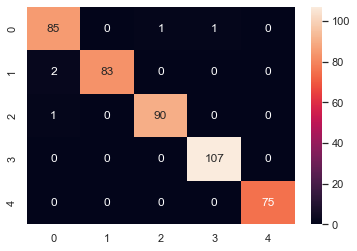

In [455]:
# calcalute confusion_matrix and draw it
sns.heatmap(confusion_matrix(y_test,y_pred ),annot =True,fmt='g')
plt.show()

In [456]:
# calcalute classification_report
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        87
           1       1.00      0.98      0.99        85
           2       0.99      0.99      0.99        91
           3       0.99      1.00      1.00       107
           4       1.00      1.00      1.00        75

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445



In [457]:
pickle.dump(VecModel,open(Tfidf,'wb'))
pickle.dump(FeatureSelection,open(FSelection,'wb'))
pickle.dump(LR, open(EXPORT_MODEL, 'wb'))

In [432]:
prediction(business)

'business'